# StyleGAN2Ada Experiments Eval

From:

- https://github.com/NVlabs/stylegan2-ada-pytorch

To export fid scores as csv:

``` bash

    cat /data/imagefolder/stylegan2/output/7/00006-images256x256-latent-auto4-kimg7000-batch128/metric-fid50k_full.jsonl | jq -r '.results | [1, .fid50k_full] | @csv' > latent_full_fid.csv

    cat /data/imagefolder/stylegan2/output/7/00006-images256x256-latent-auto4-kimg7000-batch128/s
    tats.jsonl | jq -r '. | [1, .["Loss/G/loss"].mean, .["Loss/D/loss"].mean] | @csv' > latent_full_loss.csv
```

To download verbose:

``` bash

    rsync -avz -e 'ssh' user@host:/data/imagefolder/stylegan2/output/7/00006-images256x256-latent-auto4-kimg7000-batch128 willf/Downloads

    scp user@host:latent_noise_fid.csv stats/latent_noise

```

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
def stats_fid(dir, name, snap, tick_sec, const = 0):
    stat_dir = os.path.join(dir, name)
    fid_path = os.path.join(stat_dir, f'{name}_fid.csv')
    df_fid = pd.read_csv(fid_path, index_col=None, header=None, names=list(['latent', 'fid']))
    df_fid['timestamp'] = const + ((df_fid.index.values.astype(int) + 1) * tick_sec * snap)
    return df_fid

# def stats_loss(dir, name, snap, tick_sec):
#     stat_dir = os.path.join(dir, name)
#     loss_path = os.path.join(stat_dir, f'{name}_loss.csv')
#     df_loss = pd.read_csv(loss_path, index_col=None, header=None, names=list(['latent', 'G_loss', 'D_loss', 'Fake', 'Real']))
#     df_loss['timestamp'] = df_loss.index.values.astype(int) + 1
#     return df_loss

In [4]:
filter_fid = stats_fid('data/stats/', 'latent_filter', 30, 9.5, 6 * 60)
filter_xflip_fid = stats_fid('data/stats/', 'latent_xflip_filter', 30, 9.5, 6 * 60)
filter_xflip_fixed_fid = stats_fid('data/stats/', 'latent_xflip_fixed_filter', 30, 9.5, 6 * 60)
filter_xflip_noaug_fid = stats_fid('data/stats/', 'latent_xflip_noaug_filter', 30, 9.5, 6 * 60)
noise_fid = stats_fid('data/stats/', 'latent_noise', 30, 9.5, 6 * 60)
full_fid = stats_fid('data/stats/', 'latent_full', 30, 10, 6 * 60)
norm_full_fid = stats_fid('data/stats/', 'normal_full', 30, 20)
norm_filter_fid = stats_fid('data/stats/', 'normal_filter', 30, 20)
norm_noaug_fid = stats_fid('data/stats/', 'normal_noaug', 30, 20)

In [5]:
def plot(data, labels, cols, legend = False, markers = False, split = False, figsize = (20,6), xlabel = 'seconds', ylabel = 'rating', log = False):
    plt.figure(figsize=figsize)

    if log:
        ylabel = f'log({ylabel})'

    for idx, points in enumerate(data):
        label = labels[idx]
        if split:
            plt.subplot(len(labels), 1, idx + 1).set_title(label)
        x = points['timestamp'].to_numpy()
        y = points[cols].to_numpy()
        if log:
            y = np.log10(y)
        plot_labels = list(map(lambda col: f'{col}-{label}', cols))
        plt.plot(x, y, label= plot_labels[0] if len(plot_labels) == 1 else plot_labels)
        plt.xlabel(xlabel)
        plt.xticks(np.arange(0, 35000, 2000))
        plt.ylabel(ylabel)
        if markers:
            ncol = y.shape[1]
            if ncol > 1:
                for i in range(ncol):
                    plt.scatter(x, y[:,i], color='r', s=4)
            else:
                plt.scatter(x, y, color='r', s=4)
        plt.legend()
    plt.show()

In [171]:
# plot([norm_full_fid, norm_filter_fid, norm_noaug_fid, full_fid, noise_fid, filter_fid], ['norm-full', 'norm-filter', 'norm-noaug', 'latent-full', 'latent-noise', 'latent-filter'], ['fid'], markers = True, ylabel = 'fid', log = True)

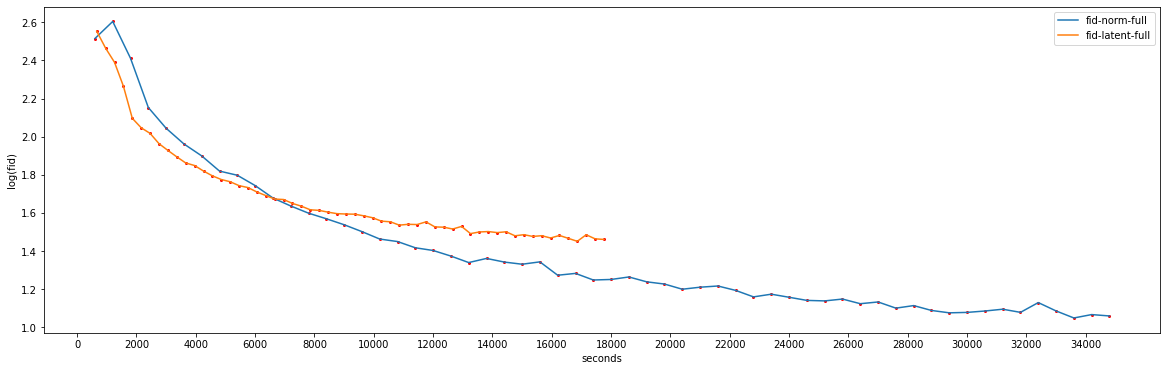

In [172]:
plot([norm_full_fid, full_fid], ['norm-full', 'latent-full'], ['fid'], markers = True, ylabel = 'fid', log = True)

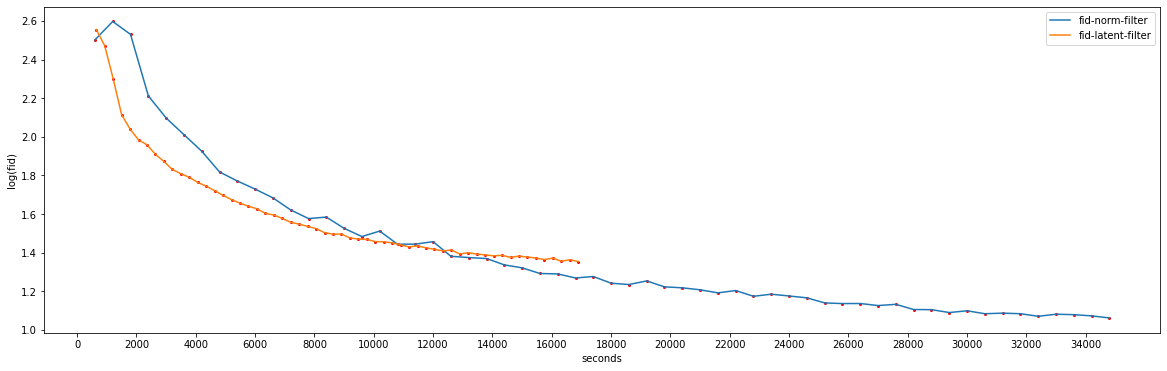

In [173]:
plot([norm_filter_fid, filter_fid], ['norm-filter', 'latent-filter'], ['fid'], markers = True, ylabel = 'fid', log = True)

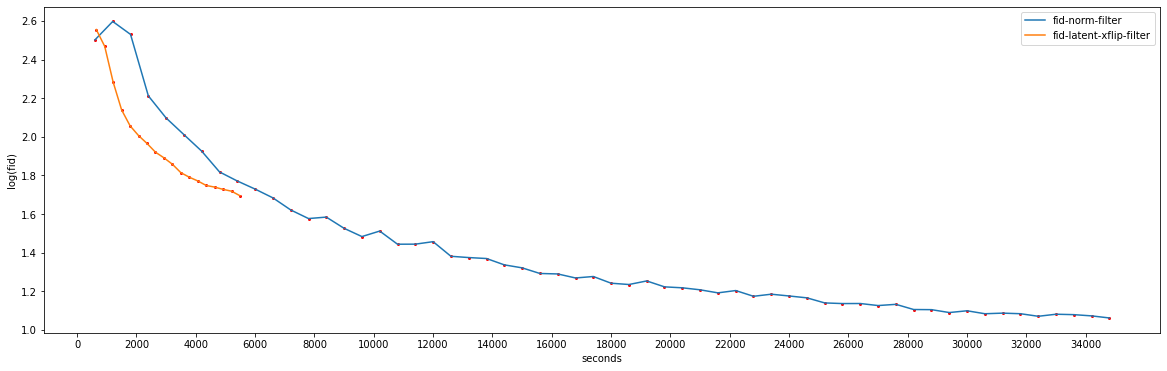

In [174]:
plot([norm_filter_fid, filter_xflip_fid], ['norm-filter', 'latent-xflip-filter'], ['fid'], markers = True, ylabel = 'fid', log = True)

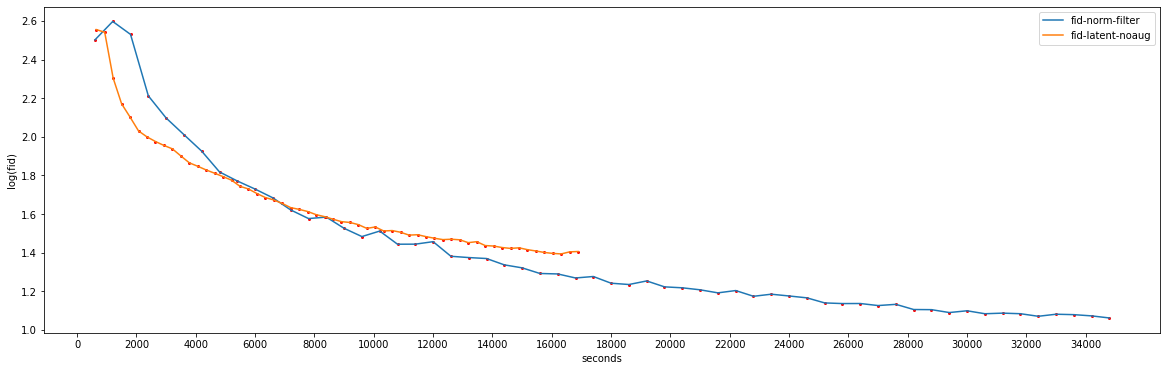

In [7]:
plot([norm_filter_fid, filter_xflip_noaug_fid], ['norm-filter', 'latent-noaug'], ['fid'], markers = True, ylabel = 'fid', log = True)

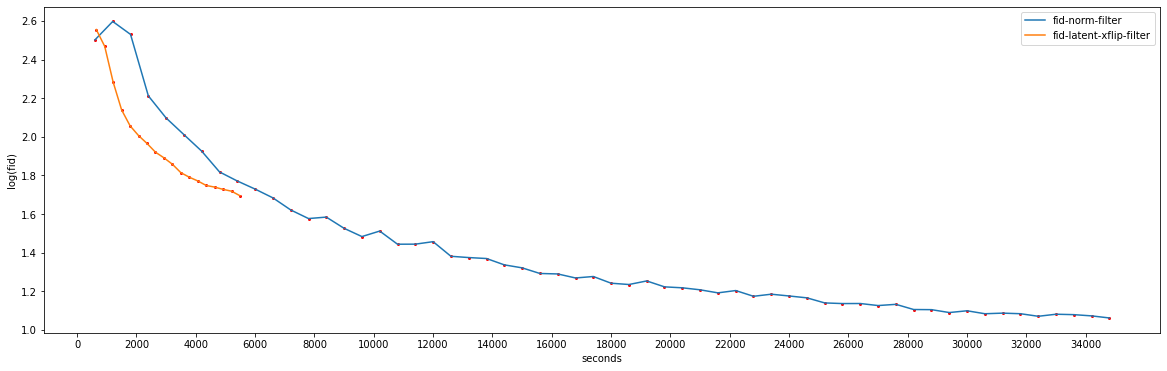

In [180]:
plot([norm_filter_fid, filter_xflip_fid], ['norm-filter', 'latent-xflip-filter'], ['fid'], markers = True, ylabel = 'fid', log = True)

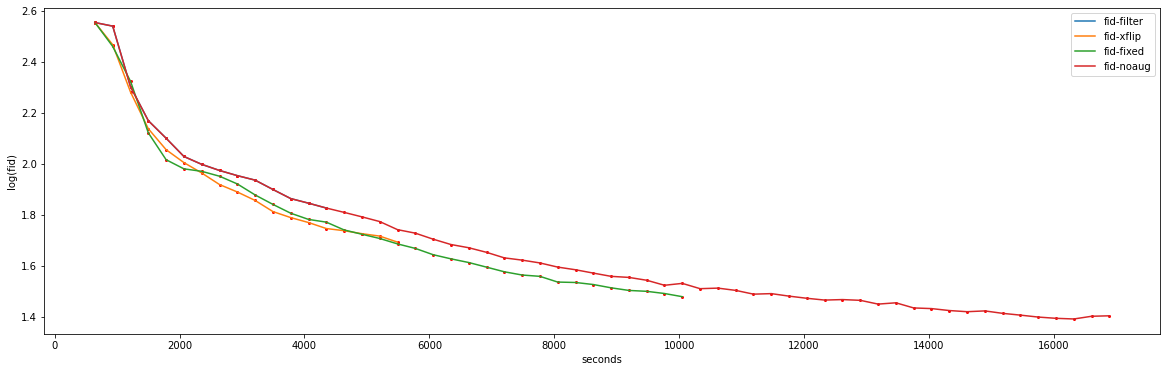

In [6]:
plot([filter_fid, filter_xflip_fid, filter_xflip_fixed_fid, filter_xflip_noaug_fid], ['filter', 'xflip', 'fixed', 'noaug'], ['fid'], markers = True, ylabel = 'fid', log = True)

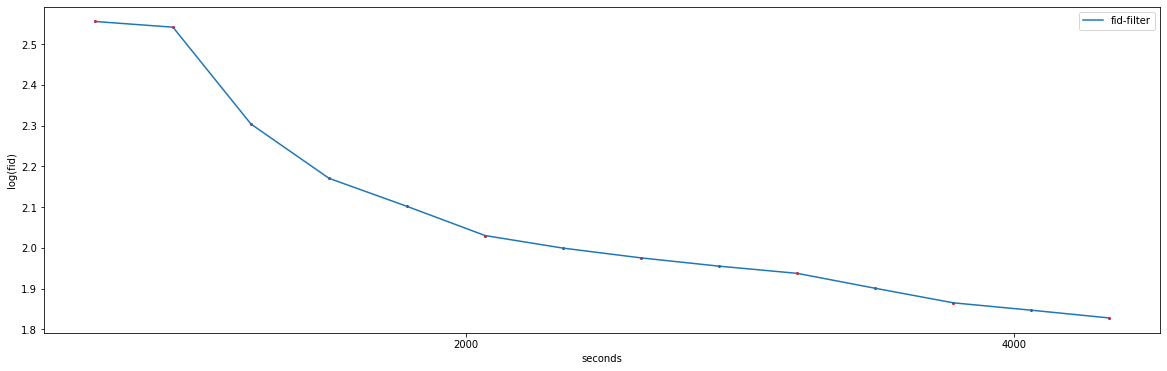

In [11]:
plot([filter_fid], ['filter', 'noaug'], ['fid'], markers = True, ylabel = 'fid', log = True)

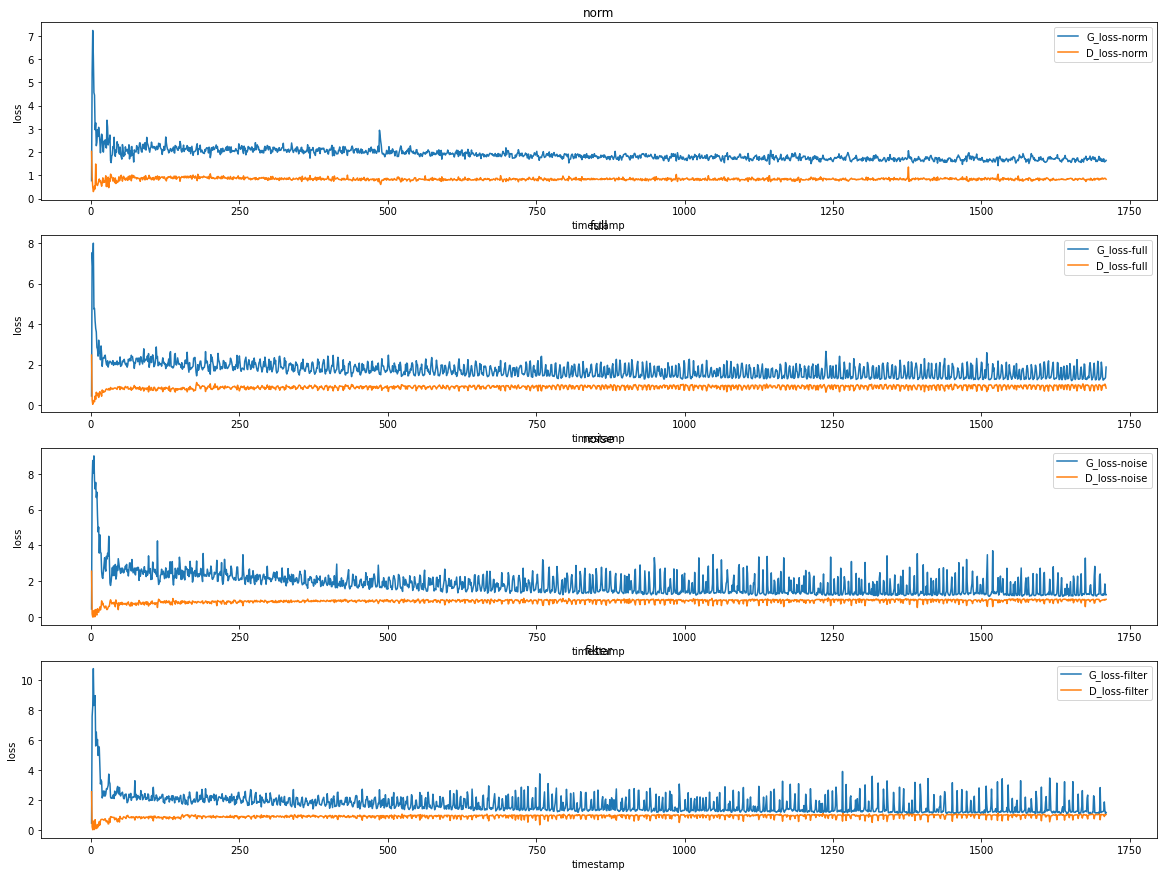

In [10]:
plot([norm_loss, full_loss, noise_loss, filter_loss], ['norm', 'full', 'noise', 'filter'], ['G_loss', 'D_loss'], split = True, figsize = (20, 15), ylabel = 'loss')

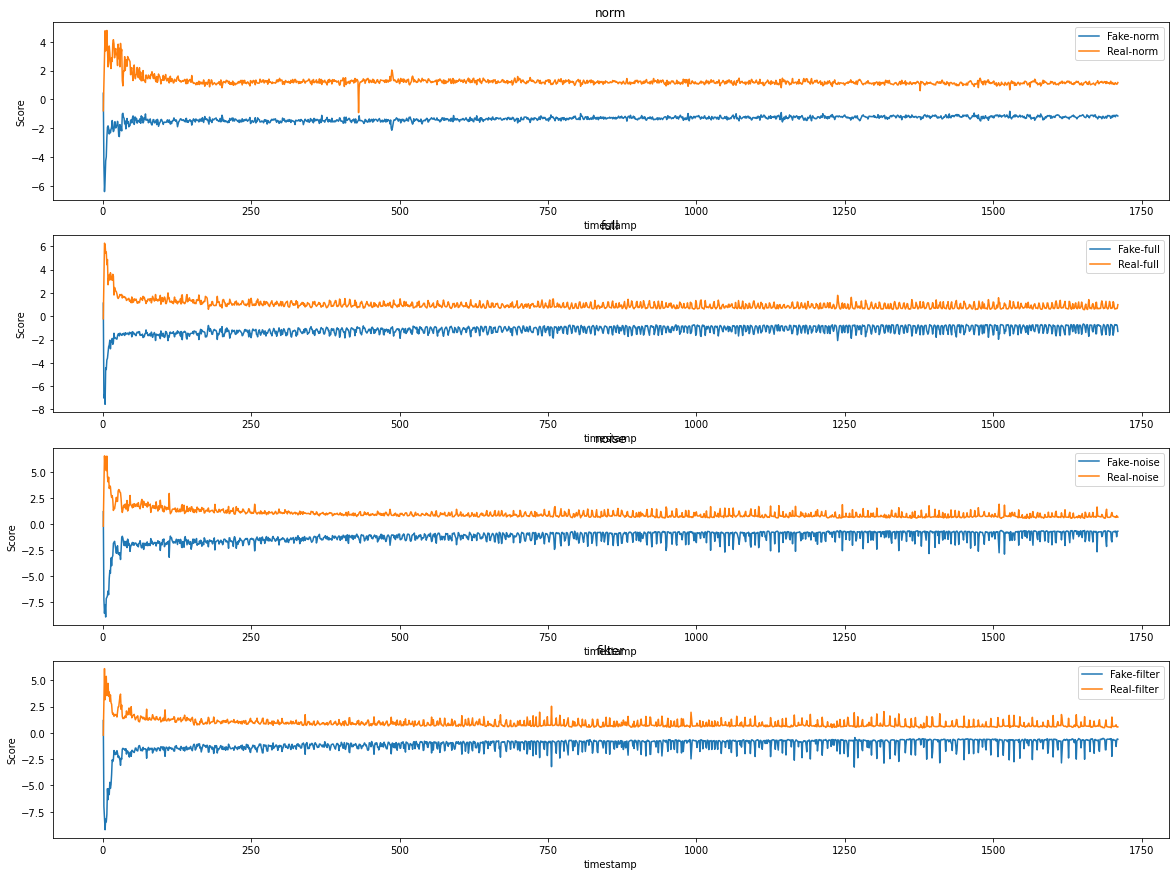

In [11]:
plot([norm_loss, full_loss, noise_loss, filter_loss], ['norm', 'full', 'noise', 'filter'], ['Fake', 'Real'], split = True, figsize = (20, 15), ylabel = 'Score')

In [102]:
def fid(path, snap, tick_sec):
    df_fid = pd.read_csv(path, index_col=None, header=None, names=list(['latent', 'fid'])).reset_index()
    df_fid['seconds'] = (df_fid.index.values.astype(int) + 1) * snap * tick_sec
    df_fid['minutes'] = df_fid['seconds'] // 60
    df_fid['hours'] = df_fid['minutes'] // 60
    df_fid = df_fid.set_index('minutes')
    return df_fid

def stats_fid_2(dir, normal_name, latent_name, snap, normal_tick_sec, latent_tick_sec):
    stat_dir = os.path.join(dir)
    normal_fid_path = os.path.join(stat_dir, f'normal_{normal_name}', f'normal_{normal_name}_fid.csv')
    latent_fid_path = os.path.join(stat_dir, f'latent_{latent_name}', f'latent_{latent_name}_fid.csv')
    df1 = fid(normal_fid_path, snap, normal_tick_sec)
    df2 = fid(latent_fid_path, snap, latent_tick_sec)
    df_fid = pd.concat([df1, df2], ignore_index=False, sort=True)
    return df_fid

latent
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fid, dtype: object

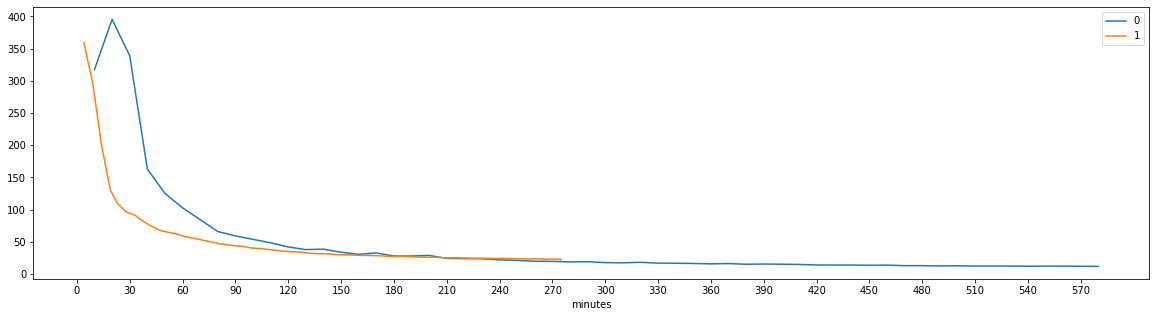

In [114]:
stats_fid_2('data/stats/', 'filter', 'filter', 30, 20, 9.5).groupby(by=['latent'])['fid'].plot(legend=True, figsize=(20,5), xticks=np.arange(0, 600, 30))
#160

latent
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fid, dtype: object

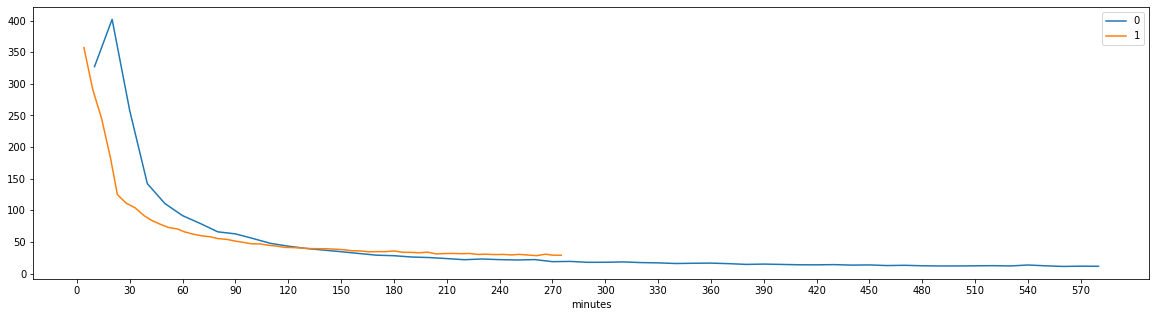

In [115]:
stats_fid_2('data/stats/', 'full', 'full', 30, 20, 9.5).groupby(by=['latent'])['fid'].plot(legend=True, figsize=(20,5), xticks=np.arange(0, 600, 30))
#110

latent
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: fid, dtype: object

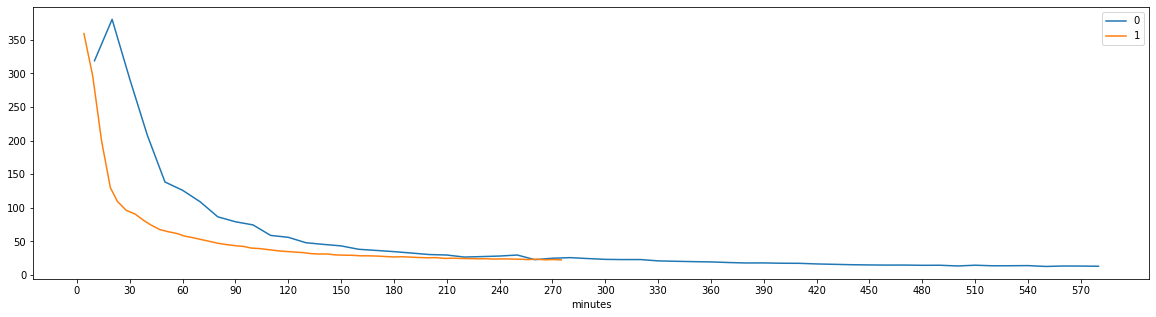

In [116]:
stats_fid_2('data/stats/', 'noaug', 'filter', 30, 20, 9.5).groupby(by=['latent'])['fid'].plot(legend=True, figsize=(20,5), xticks=np.arange(0, 600, 30))
#220